In [1]:
#Bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import numpy as np

<span style="font-size: 20px; color: Black; font-family: 'Times New Roman';">**Multiplicador Monetário**</span>

<span style="font-size: 15px; color: Black; font-family: 'Times New Roman';">
Cálculo do Multiplicador Monetário a partir dos indicadores fornecidos pelo Banco Central e criação do gráfico.</span>

<span style="font-size: 15px; color: Black; font-family: 'Times New Roman';">(https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries)</span>

<span style="font-size: 15px; color: Black; font-family: 'Times New Roman';">
Código 7530 - preferência por papel-moeda (C)
    
Código 7531 - preferência por depósitos à vista (D)

<span style="font-size: 15px; color: Black; font-family: 'Times New Roman';">
Código 7532 - taxa de encaixe em moeda corrente (R1)
    
Código 7533 - taxa de reservas bancárias (R2)

</span>

<span style="font-size: 12px; color: Black; font-family: 'Times New Roman';">Isabela F. C. Lins (isabela.fclins@ufpe.br)</span>
---

In [2]:
#Importando dados do GitHub
df = pd.read_csv('https://raw.githubusercontent.com/isaflins/monetaria_exame2/refs/heads/main/indicadores_multmonetario.csv', delimiter=';')
df

,Data,C,D,R1,R2
0,jan/92,"0,32","0,68","0,07","0,35"
1,fev/92,"0,32","0,68","0,07","0,32"
2,mar/92,"0,31","0,69","0,07","0,32"
3,abr/92,"0,3","0,7","0,07","0,31"
4,mai/92,"0,3","0,7","0,07","0,32"
...,...,...,...,...,...
391,ago/24,"0,45","0,55","0,14","0,24"
392,set/24,"0,46","0,54","0,13","0,24"
393,out/24,"0,46","0,54","0,14","0,26"
394,nov/24,"0,46","0,54","0,14","0,25"


In [3]:
# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Converter as colunas para tipo numérico (substituindo vírgula por ponto)
df['C'] = df['C'].str.replace(',', '.').astype(float)
df['D'] = df['D'].str.replace(',', '.').astype(float)
df['R1'] = df['R1'].str.replace(',', '.').astype(float)
df['R2'] = df['R2'].str.replace(',', '.').astype(float)

# Calcular o multiplicador monetário
df['K'] = 1 / (df['C'] + df['D'] * (df['R1'] + df['R2']))

# Visualizar as primeiras linhas do multiplicador
print(df[['Data', 'K']].head())

     Data         K
0  jan/92  1.651255
1  fev/92  1.708817
2  mar/92  1.726817
3  abr/92  1.766784
4  mai/92  1.745201


In [4]:
# Dicionário para converter meses abreviados em português para números
mes_map = {
    'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04', 'mai': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'set': '09', 'out': '10', 'nov': '11', 'dez': '12'
}

# Supondo que a coluna 'Data' tenha valores como 'jan/92'
df["Data"] = df["Data"].str.lower().str.strip()  # Garantir que os meses estão em minúsculas e sem espaços extras

# Substituir o nome do mês pelo número correspondente
df["Data"] = df["Data"].replace(mes_map, regex=True)

# Converter para o formato 'YYYYM1'
df["Data"] = df["Data"].str.replace("M", "-")
df["Data"] = pd.to_datetime(df["Data"], format='%m/%y')
df["Data"] = df["Data"].dt.strftime('%Y-%m')
df.set_index("Data", inplace=True)


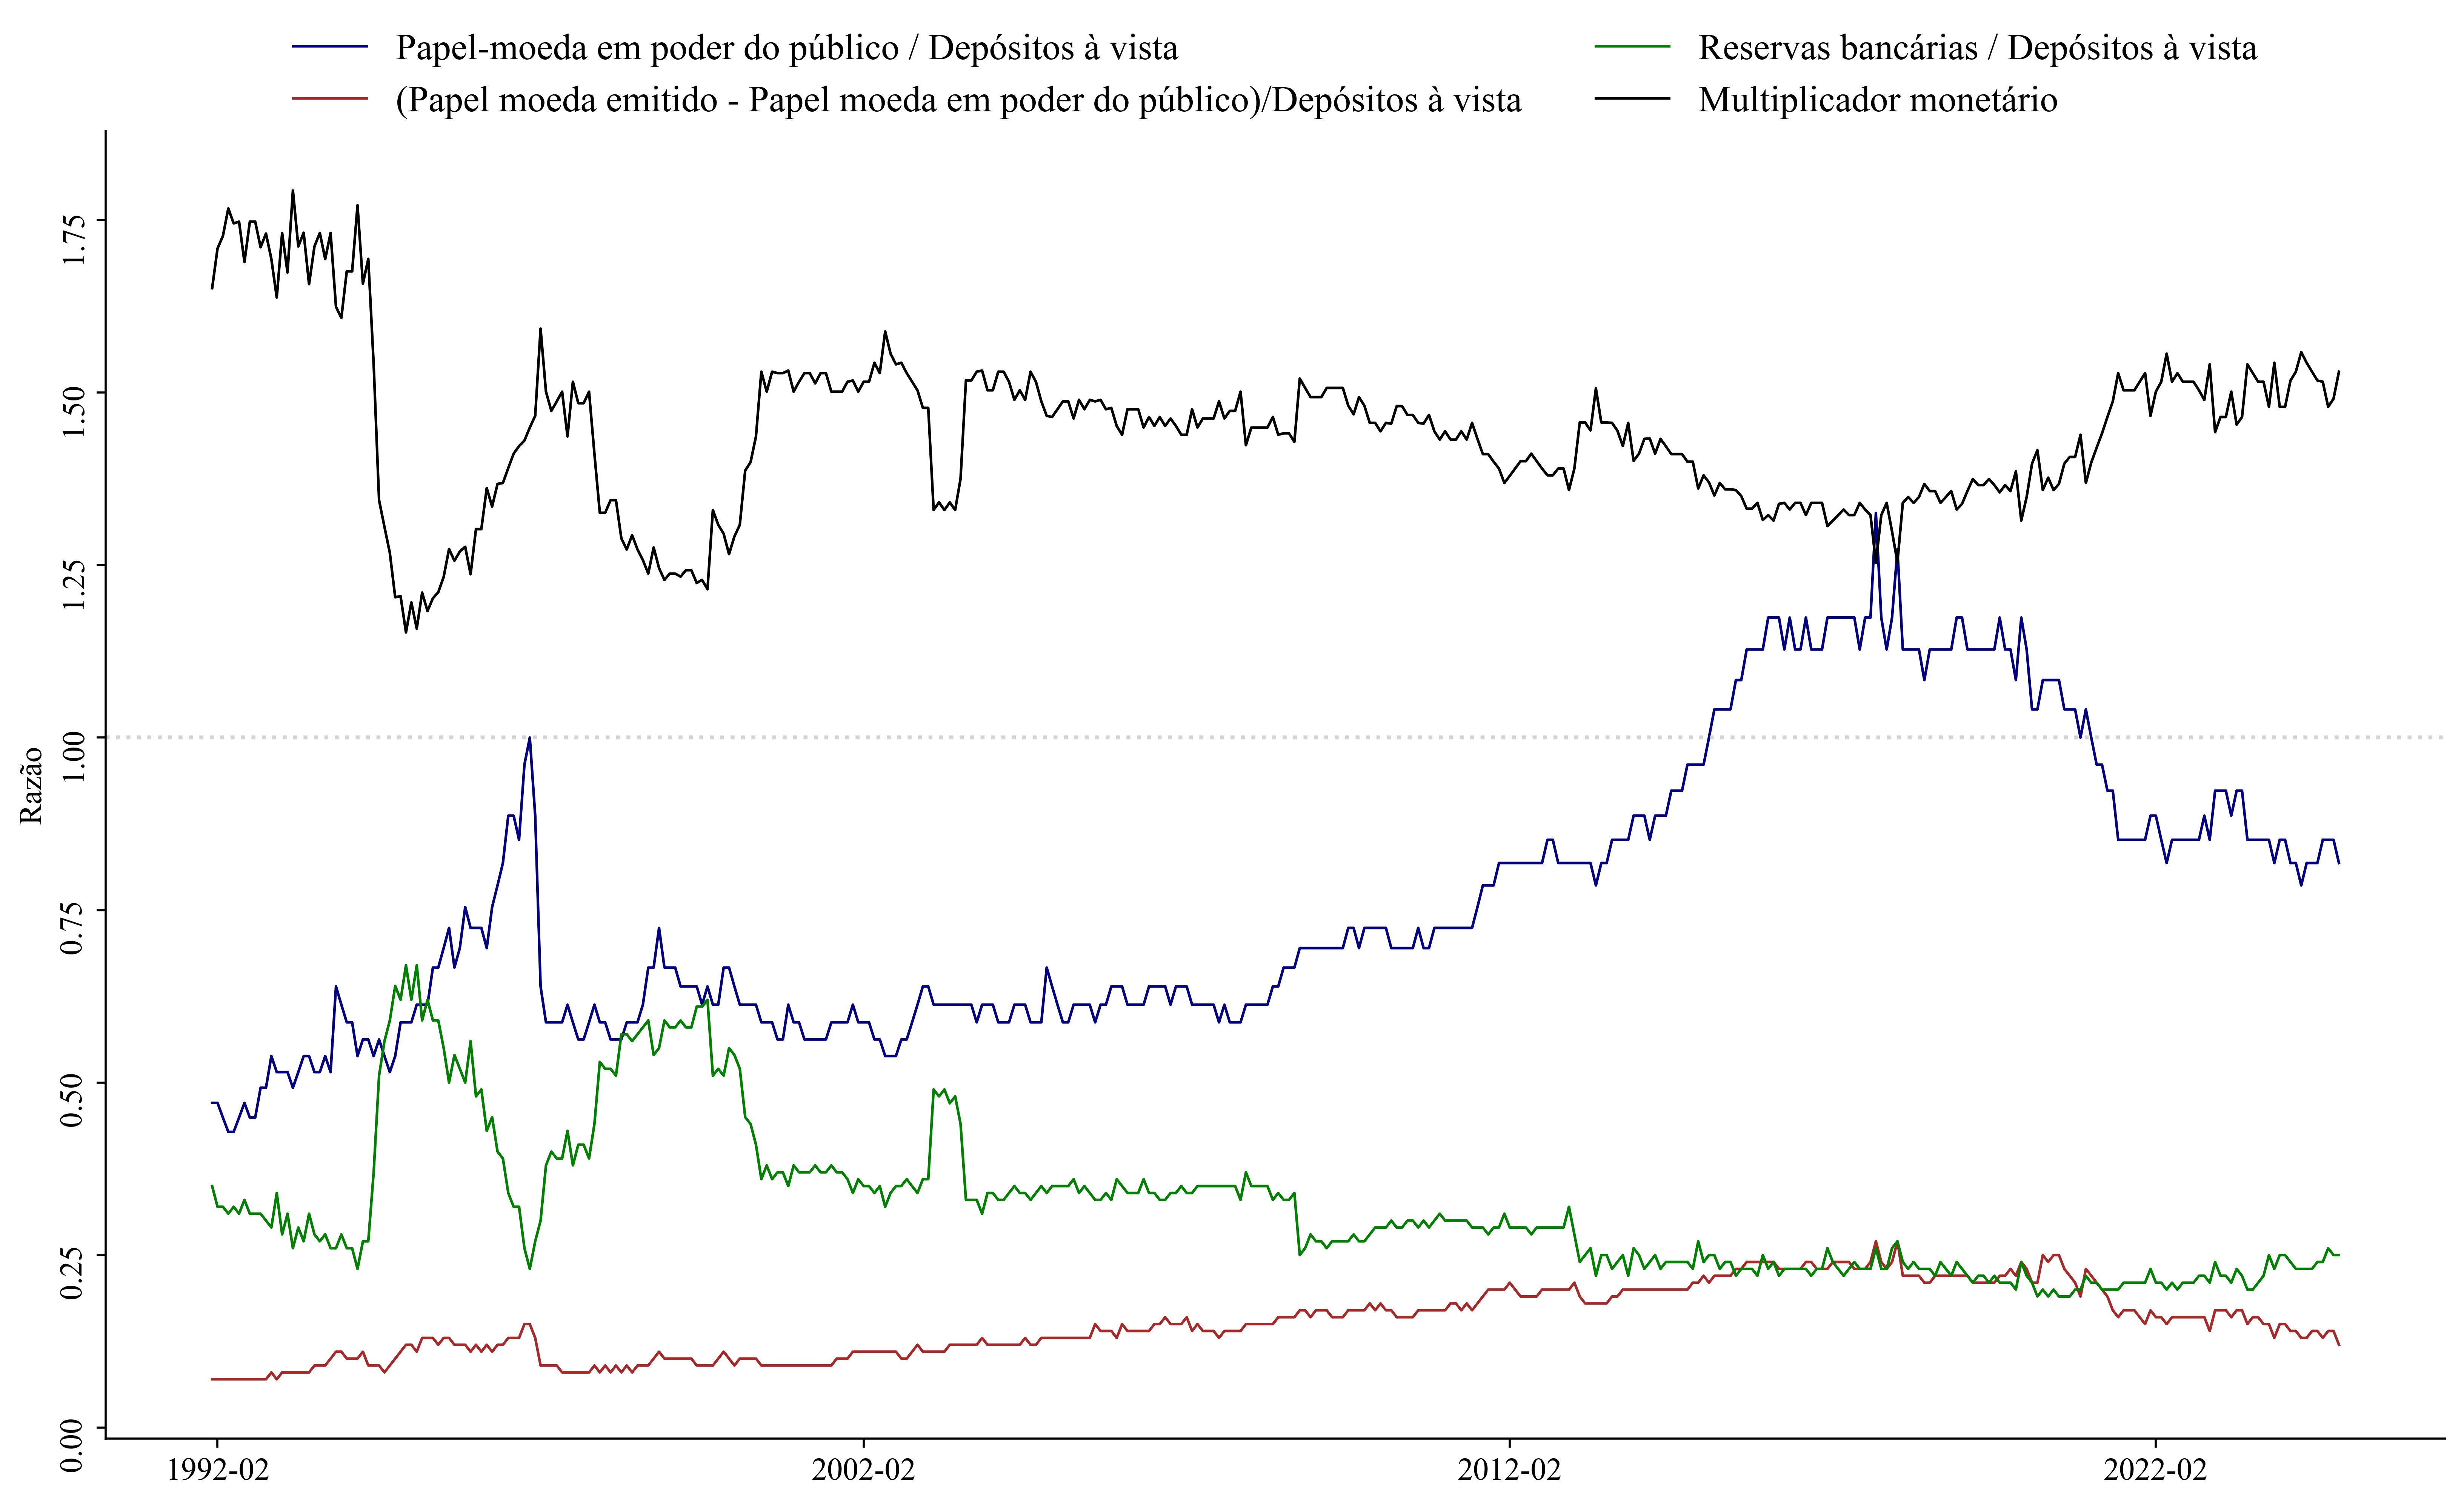

In [5]:
# Excluindo os eixos do topo e direito dos gráficos
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True

#Plotando
plt.figure(figsize=(16,9), dpi=500)
plt.plot(df.index, df['C'] / df['D'], label='Papel-moeda em poder do público / Depósitos à vista', color='navy', lw=1.0)
plt.plot(df.index, df['R1'], label='(Papel moeda emitido - Papel moeda em poder do público)/Depósitos à vista', color='brown', lw=1.0)
plt.plot(df.index, df['R2'], label='Reservas bancárias / Depósitos à vista', color='green', lw=1.0)
plt.plot(df.index, df['K'], label='Multiplicador monetário', color='black', lw=1.0)
plt.axhline(y = 1, color = 'lightgrey', linestyle = 'dotted')
plt.xticks(pd.date_range(df.index[1], df.index[-1], freq='120m').strftime('%Y-%m'),rotation=0)
plt.xticks(fontname="Times New Roman", fontsize=12)
plt.yticks(fontname="Times New Roman", fontsize=12, rotation=90)
plt.ylabel("Razão", fontname='Times New Roman', fontsize=12)

#Personalizando a legenda
legenda = plt.legend(loc='upper center', prop={'family': 'Times New Roman', 'size': 14}, bbox_to_anchor=(0.5, 1.1), ncol=2)
for texto in legenda.get_texts():
    texto.set_fontname("Times New Roman")

#Personalizando a caixa da legenda
caixa = legenda.get_frame()
caixa.set_edgecolor('black')  #Cor da borda
caixa.set_facecolor('white')  #Cor de fundo
caixa.set_linewidth(1.0)      #Largura da borda
caixa.set_alpha(0)            #Transparência da caixa

plt.show()

<span style="font-size: 20px; color: Black; font-family: 'Times New Roman';">**PIX**</span>

<span style="font-size: 15px; color: Black; font-family: 'Times New Roman';">Correlação entre a quantidade de transações realizadas no Pix e 
o multiplicador monetário (K).</span>

<span style="font-size: 15px; color: Black; font-family: 'Times New Roman';">(https://www.bcb.gov.br/estatisticas/spbadendos?ano=2024)</span>

<span style="font-size: 12px; color: Black; font-family: 'Times New Roman';">Isabela F. C. Lins (isabela.fclins@ufpe.br)</span>

---

In [ ]:
#Pix - Quantidade Mensal (mil)
#Importando dados do GitHub

#Tratando os dados
df1 = pd.read_csv('https://raw.githubusercontent.com/isaflins/monetaria_exame2/f5841e319c10b3bc051e0df293755dafa14d4f27/quant_pix.csv', delimiter=';', dtype={"Date":str})
df1["Date"]=df1["Date"].astype("str").str.replace(".","-")
df1["Date"]=pd.to_datetime(df1["Date"]).dt.strftime("%Y-%m")
df1.set_index(df1["Date"],inplace=True,drop=True)

In [ ]:
import pandas as pd
from datetime import datetime

# Filtrando o índice da base 'df' a partir de março de 2022
df = df.loc[df.index >= '2022-03']

# Garantindo que os índices das duas bases estejam alinhados
df1 = df1.loc[df.index]

# Convertendo as colunas 'K' e 'Pix' para float, substituindo vírgulas por pontos
df['K'] = df['K'].astype(str).str.replace(',', '.').astype(float)
df1['Pix'] = df1['Pix'].astype(str).str.replace(',', '.').astype(float)

# Calculando a correlação entre a coluna 'K' de 'df' e a coluna 'Pix' de 'df1'
correlacao = df['K'].corr(df1['Pix'])

print(f"Correlação entre K e Pix: {correlacao:.4f}")

In [ ]:
# Excluindo os eixos do topo e direito dos gráficos
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True

#Plotando
plt.figure(figsize=(16,9), dpi=500)
plt.title('Pix - Quantidade Mensal', fontname='Times New Roman', fontsize=14, fontweight="bold")
plt.plot(df1.index, df1['Pix'], label='Papel-moeda em poder do público / Depósitos à vista', color='navy', lw=1.0)
plt.axhline(y = 1, color = 'lightgrey', linestyle = 'dotted')
plt.xticks(pd.date_range(df1.index[1], df1.index[-1], freq='12m').strftime('%Y-%m'),rotation=0)
plt.xticks(fontname="Times New Roman", fontsize=12)
plt.yticks(fontname="Times New Roman", fontsize=12, rotation=90)
plt.ylabel("Qunatidade", fontname='Times New Roman', fontsize=12)

#Personalizando a caixa da legenda
caixa = legenda.get_frame()
caixa.set_edgecolor('black')  #Cor da borda
caixa.set_facecolor('white')  #Cor de fundo
caixa.set_linewidth(1.0)      #Largura da borda
caixa.set_alpha(0)            #Transparência da caixa

plt.show()